In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Load the dataset
file_path = 'OKCupid_profiles.csv' 
okcupid_data = pd.read_csv(file_path)

# Select relevant columns
relevant_columns = ['diet', 'drinks', 'drugs', 'smokes', 'status', 'religion', 'body_type', 'pets']
okcupid_data_subset = okcupid_data[relevant_columns].copy()  

# Map `status` to binary categories: `single` -> 0, `in a relationship` -> 1
status_mapping = {
    'single': 0,
    'available': 0,  # Assuming "available" also means single
    'seeing someone': 1,
    'married': 1,
    'unknown': None  # Treating "unknown" as missing
}
okcupid_data_subset['status'] = okcupid_data_subset['status'].map(status_mapping)

# Fill missing values in lifestyle habit columns with "unknown"
okcupid_data_subset.fillna({'diet': 'unknown', 'drinks': 'unknown', 
                            'drugs': 'unknown', 'smokes': 'unknown', 
                            'religion': 'unknown', 'body_type': 'unknown', 
                            'pets': 'unknown'}, inplace=True)

# Encode `drinks`
drinks_mapping = {
    'not at all': 0,
    'rarely': 1,
    'socially': 2,
    'often': 3,
    'very often': 4,
    'desperately': 5,
    'unknown': -1
}
okcupid_data_subset['drinks'] = okcupid_data_subset['drinks'].map(drinks_mapping)

# Encode `drugs`
drugs_mapping = {
    'never': 0,
    'sometimes': 1,
    'often': 2,
    'unknown': -1
}
okcupid_data_subset['drugs'] = okcupid_data_subset['drugs'].map(drugs_mapping)

# Encode `smokes`
smokes_mapping = {
    'no': 0,
    'trying to quit': 1,
    'when drinking': 2,
    'sometimes': 3,
    'yes': 4,
    'unknown': -1
}
okcupid_data_subset['smokes'] = okcupid_data_subset['smokes'].map(smokes_mapping)

# Simplify and encode `diet`
diet_categories = {
    'vegetarian': 1, 'vegan': 2, 'kosher': 3, 'halal': 4, 'anything': 5,
    'other': 6, 'unknown': -1
}
okcupid_data_subset['diet'] = okcupid_data_subset['diet'].apply(
    lambda x: diet_categories.get(next((key for key in diet_categories if key in str(x)), 'unknown'))
)

# Encode `religion`
religion_mapping = {
    'agnosticism': 0, 'atheism': 1, 'buddhism': 2, 'catholicism': 3, 'christianity': 4,
    'hinduism': 5, 'islam': 6, 'judaism': 7, 'other': 8, 'unknown': -1
}
okcupid_data_subset['religion'] = okcupid_data_subset['religion'].apply(
    lambda x: religion_mapping.get(next((key for key in religion_mapping if key in str(x).lower()), 'unknown'))
)

# Encode `body_type`
body_type_mapping = {
    'thin': 0, 'fit': 1, 'athletic': 2, 'average': 3, 'curvy': 4,
    'overweight': 5, 'a little extra': 6, 'full figured': 7, 'jacked': 8,
    'used up': 9, 'unknown': -1
}
okcupid_data_subset['body_type'] = okcupid_data_subset['body_type'].apply(
    lambda x: body_type_mapping.get(next((key for key in body_type_mapping if key in str(x).lower()), 'unknown'))
)

# Encode `pets`
pets_mapping = {
    'likes dogs': 1, 'likes cats': 2, 'likes both': 3, 
    'dislikes pets': 4, 'unknown': -1
}
okcupid_data_subset['pets'] = okcupid_data_subset['pets'].apply(
    lambda x: pets_mapping.get(next((key for key in pets_mapping if key in str(x).lower()), 'unknown'))
)

# Split data into features and target
X = okcupid_data_subset[['diet', 'drinks', 'drugs', 'smokes', 'religion', 'body_type', 'pets']]
y = okcupid_data_subset['status']

# Handle missing target values
X = X[y.notnull()]
y = y[y.notnull()]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

okcupid_data_subset.head()

,diet,drinks,drugs,smokes,status,religion,body_type,pets
0,5,2,0,3,0.0,0,6,1
1,6,3,1,0,0.0,0,3,1
2,5,2,-1,0,0.0,-1,0,-1
3,1,2,-1,0,0.0,-1,0,2
4,-1,2,0,0,0.0,-1,2,1


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the pipeline for modeling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Standardize the data
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic regression
])

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Print results
print(f"Cross-validation mean accuracy: {cv_mean:.4f}")
print(f"Cross-validation accuracy standard deviation: {cv_std:.4f}")

Cross-validation mean accuracy: 0.9604
Cross-validation accuracy standard deviation: 0.0000


Classification Report:
                    precision    recall  f1-score   support

           Single       0.97      0.87      0.92     11513
In a Relationship       0.07      0.25      0.11       475

         accuracy                           0.85     11988
        macro avg       0.52      0.56      0.51     11988
     weighted avg       0.93      0.85      0.88     11988

ROC-AUC Score: 0.4377059342528126


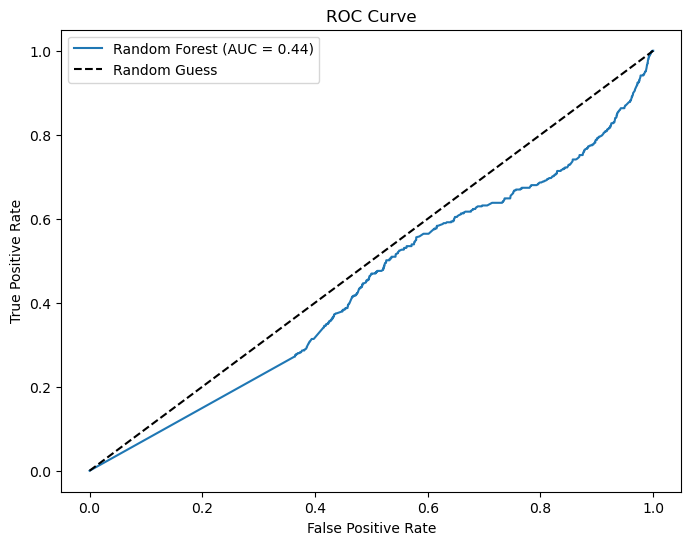


Feature Importances:
     Feature  Importance
5  body_type    0.243692
4   religion    0.201563
1     drinks    0.146487
3     smokes    0.139527
0       diet    0.108949
2      drugs    0.087775
6       pets    0.072006

Sample Predictions:
  Actual Status  Predicted Likelihood of Being Single
0        Single                                 1.000
1        Single                                 1.000
2        Single                                 1.000
3        Single                                 1.000
4        Single                                 1.000
5        Single                                 0.512
6        Single                                 1.000
7        Single                                 0.249
8        Single                                 0.890
9        Single                                 0.275


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict probabilities for the test set
y_proba = rf_model.predict_proba(X_test)[:, 0]  # Probability of being single (class 0)
y_pred = rf_model.predict(X_test)

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Single', 'In a Relationship']))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Feature importance analysis
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Show likelihood predictions
predictions_df = pd.DataFrame({
    'Actual Status': y_test.map({0: 'Single', 1: 'In a Relationship'}).reset_index(drop=True),
    'Predicted Likelihood of Being Single': y_proba.round(3)
})
print("\nSample Predictions:")
print(predictions_df.head(10))

Classification Report:
                    precision    recall  f1-score   support

           Single       0.97      0.62      0.76     11513
In a Relationship       0.06      0.56      0.11       475

         accuracy                           0.62     11988
        macro avg       0.51      0.59      0.43     11988
     weighted avg       0.94      0.62      0.73     11988

ROC-AUC Score: 0.6207487188395726


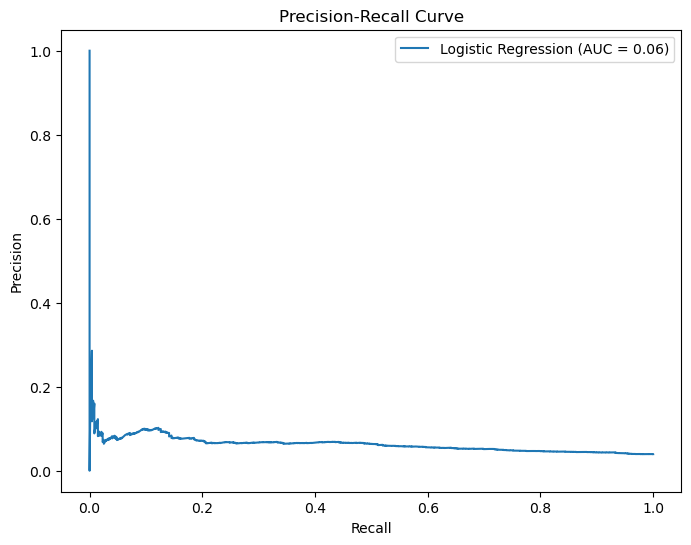


Feature Importance (Logistic Regression Coefficients):
     Feature  Coefficient
6       pets     0.246715
2      drugs     0.161498
1     drinks     0.038125
3     smokes     0.037320
4   religion     0.010480
5  body_type    -0.018597
0       diet    -0.110812

Sample Predictions:
  Actual Status  Predicted Likelihood of Being Single  \
0        Single                                 0.517   
1        Single                                 0.537   
2        Single                                 0.382   
3        Single                                 0.672   
4        Single                                 0.450   
5        Single                                 0.710   
6        Single                                 0.461   
7        Single                                 0.475   
8        Single                                 0.675   
9        Single                                 0.383   

   Predicted Likelihood of Being in a Relationship  
0                                 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression with class weights to handle imbalance
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict probabilities and labels
y_proba_logreg = log_reg.predict_proba(X_test)[:, 1]  # Probability of being "In a Relationship"
y_pred_logreg = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_logreg, target_names=['Single', 'In a Relationship']))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_logreg))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_logreg)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Logistic Regression (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Feature importance
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Logistic Regression Coefficients):")
print(coefficients)

# Show predicted probabilities
predictions_df = pd.DataFrame({
    'Actual Status': y_test.map({0: 'Single', 1: 'In a Relationship'}).reset_index(drop=True),
    'Predicted Likelihood of Being Single': 1 - y_proba_logreg.round(3),  # 1 - Probability of "In a Relationship"
    'Predicted Likelihood of Being in a Relationship': y_proba_logreg.round(3)
})
print("\nSample Predictions:")
print(predictions_df.head(10))

Classification Report:
                    precision    recall  f1-score   support

           Single       0.97      0.59      0.74     11513
In a Relationship       0.06      0.59      0.10       475

         accuracy                           0.59     11988
        macro avg       0.51      0.59      0.42     11988
     weighted avg       0.94      0.59      0.71     11988

ROC-AUC Score: 0.6168243678770452


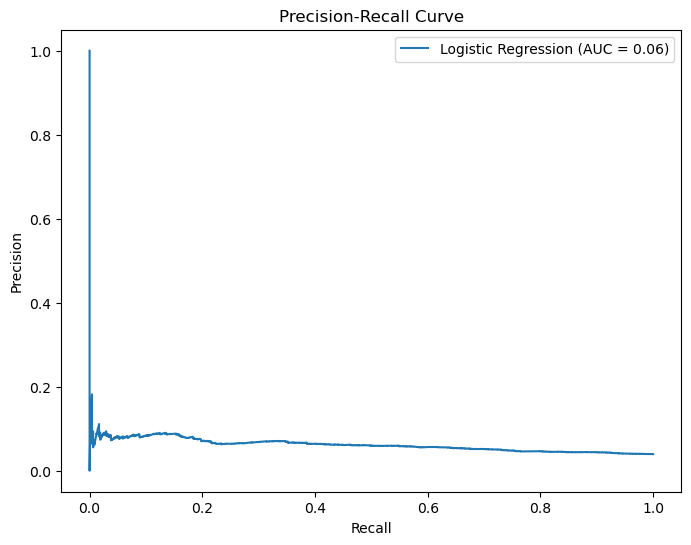


Feature Importance (Logistic Regression Coefficients):
     Feature  Coefficient
6       pets     0.250324
2      drugs     0.131454
3     smokes     0.032794
4   religion     0.015485
1     drinks    -0.090510
5  body_type    -0.095667
0       diet    -0.322738


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with L2 regularization
log_reg = LogisticRegression(random_state=42, class_weight=None, max_iter=1000, penalty='l2')
log_reg.fit(X_train_scaled, y_train_balanced)

# Predict probabilities and labels
y_proba_logreg = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability of "In a Relationship"
y_pred_logreg = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_logreg, target_names=['Single', 'In a Relationship']))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_logreg))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_logreg)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Logistic Regression (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Feature importance
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Logistic Regression Coefficients):")
print(coefficients)

Classification Report with SMOTE and Interactions:
               precision    recall  f1-score   support

         0.0       0.97      0.60      0.74     11513
         1.0       0.06      0.59      0.11       475

    accuracy                           0.60     11988
   macro avg       0.52      0.60      0.42     11988
weighted avg       0.94      0.60      0.72     11988

ROC-AUC Score: 0.6171211490900447

Classification Report (Optimized Threshold):
               precision    recall  f1-score   support

         0.0       0.97      0.76      0.85     11513
         1.0       0.07      0.42      0.12       475

    accuracy                           0.75     11988
   macro avg       0.52      0.59      0.48     11988
weighted avg       0.93      0.75      0.82     11988

Optimal Threshold: 0.5625275894283971

Impactful Interaction Terms:
         Feature  Coefficient
2          drugs     0.649142
3         smokes     0.210883
6           pets     0.168911
0           diet    -0.10

/var/folders/_x/bxt428t56g51tq23n769vbbc0000gn/T/ipykernel_84236/2181292840.py:33: RuntimeWarning: invalid value encountered in divide
  f1_scores = np.nan_to_num(2 * (precision * recall) / (precision + recall), nan=0.0)


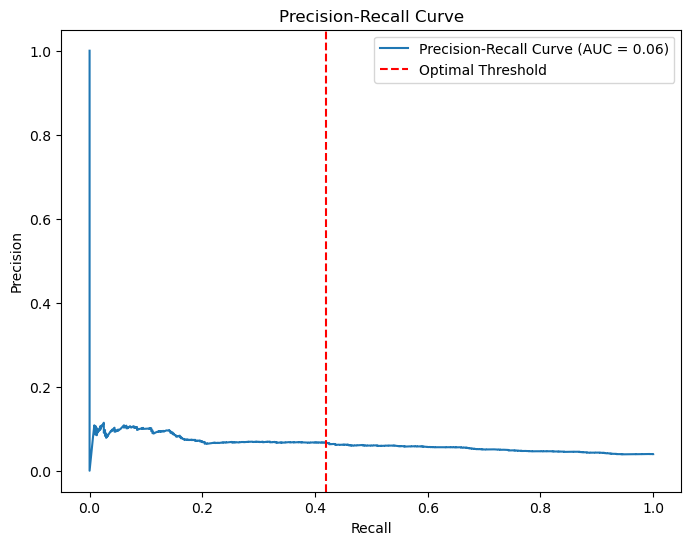

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 2: Create interaction terms only for the balanced dataset
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interactions = interaction.fit_transform(X_train_balanced)
X_test_interactions = interaction.transform(X_test)

# Get feature names for interactions
interaction_feature_names = interaction.get_feature_names_out(X_train.columns)

# Step 3: Train Logistic Regression with class balancing
log_reg = LogisticRegression(random_state=42, max_iter=1000, C=10, class_weight=None, penalty='l2')
log_reg.fit(X_train_interactions, y_train_balanced)

# Step 4: Evaluate the model
y_proba_logreg = log_reg.predict_proba(X_test_interactions)[:, 1]
y_pred_logreg = log_reg.predict(X_test_interactions)

print("Classification Report with SMOTE and Interactions:\n", classification_report(y_test, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_logreg))

# Step 5: Optimize decision threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_logreg)
# Compute F1-scores, handling invalid values
f1_scores = np.nan_to_num(2 * (precision * recall) / (precision + recall), nan=0.0)

# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Predict with the optimized threshold
y_pred_optimized = (y_proba_logreg >= optimal_threshold).astype(int)

# Evaluate the model with the new threshold
print("\nClassification Report (Optimized Threshold):\n", classification_report(y_test, y_pred_optimized))
print("Optimal Threshold:", optimal_threshold)

# Step 6: Feature Importance
coefficients = pd.DataFrame({
    'Feature': interaction_feature_names,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

impactful_interactions = coefficients[coefficients['Coefficient'].abs() > 0.1]  # Adjust threshold as needed

print("\nImpactful Interaction Terms:")
print(impactful_interactions)

# Step 7: Plot Precision-Recall Curve
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AUC = {pr_auc:.2f})")
plt.axvline(x=recall[np.argmax(f1_scores)], color='r', linestyle='--', label='Optimal Threshold')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()